In [1]:
import os 
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

# !python -m spacy download en_core_web_trf
# !python -m spacy download es_core_web_trf
# nltk.download()
import spacy 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from chamd import ChatReader
reader = ChatReader()

# Import the Self-scripted .py for task-specific functions
import Analysis 
from Analysis import raw_chat_to_dataframe
from Analysis import summary_table
from Analysis import q1_stentence_length
from Analysis import q2_sentence_cleaning
from Analysis import q2_part_of_speech

# Set display options for dataframes/plots
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_colwidth=120

folder = "/Users/noel/Documents/GitHub/Projects_Selected/Frog Story Corpora/data_from_official_site"

## 1) Transform all transcripts into readable dataframes

a) Extract information by researcher - Spanish

b) Extract information by researcher - English

c) Combine all the extracted information by languages 

In [2]:
# a) Extract information by researcher - Spanish
df_spa_agu = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "Spanish-Aguilar"))
df_spa_mia = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "Spanish-MiamiBiling"))
df_spa_orn = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "Spanish-Ornat"))

# b) Extract information by researcher - English
df_eng_esc = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "English-ECSC"))
df_eng_mia1 = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "English-MiamiBiling"))
df_eng_mia2 = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "English-MiamiMono"))
df_eng_wol = raw_chat_to_dataframe(data_folder_raw=os.path.join(folder, "English-WolfHemp"))

print("\n Data preview: one data set for SPA - Aguilar:")
display(df_spa_agu.head(3))

print("Data preview: one data set for ENG - ECSC:")
display(df_eng_esc.head(3))

# c) Combine all the extracted information by languages 
df_all_spa = pd.concat([df_spa_agu, df_spa_mia, df_spa_orn])
df_all_eng = pd.concat([df_eng_esc, df_eng_mia1, df_eng_mia2, df_eng_wol])

print("Included researchers for all records:")
print(list(df_all_spa.lan_researcher.unique()))
print(list(df_all_eng.lan_researcher.unique()))

Spanish-Aguilar :  N(unique) = 18
Spanish-MiamiBiling :  N(unique) = 176
Spanish-Ornat :  N(unique) = 50
English-ECSC :  N(unique) = 342
English-MiamiBiling :  N(unique) = 176
English-MiamiMono :  N(unique) = 89
English-WolfHemp :  N(unique) = 87

 Data preview: one data set for SPA - Aguilar:


,data,lan_researcher,role,age,sex,text,age_category
0,0602.cha,Spanish-Aguilar,Target_Child,6,female,el niño está viendo el cómo se llama ?| el sapo !| y el perro se está asomando al frasco .| y se le puede atorar la ...,3-6
1,0604.cha,Spanish-Aguilar,Target_Child,6,,de que un niño atrapó una rana .| y el perro y el niño lo están viendo .| y después el perro la miró desde cerca .| ...,3-6
2,0605.cha,Spanish-Aguilar,Target_Child,6,male,aquí el niño tuvo una rana y el perro la vio .| y cuando el niño se durmió .| la rana se le escapó del frasco .| el ...,3-6


Data preview: one data set for ENG - ECSC:


,data,lan_researcher,role,age,sex,text,age_category
0,100M_2027_YR1.cha,English-ECSC,Target_Child,8,male,once upon a time there was a boy .| and his dog .| boy was named .| joe .| his dog was named .| pal .| and .| he had...,6-9
1,102F_1015_YR1.cha,English-ECSC,Target_Child,8,female,one day the boy finds a present on christmas and is like 'ooh yay it's for me .| and then .| he's opening the presen...,6-9
2,102F_1015_YR2.cha,English-ECSC,Target_Child,8,female,once upon a time a little boy named bob was walking down .| the .| walking in the woods .| with his dog kubrick .| h...,6-9


Included researchers for all records:
['Spanish-Aguilar', 'Spanish-MiamiBiling', 'Spanish-Ornat']
['English-ECSC', 'English-MiamiBiling', 'English-MiamiMono', 'English-WolfHemp']


d) Generate summary tables by languages - For combined records

In [3]:
# d) Generate summary tables by languages - For combined records
summary_all_spa = summary_table(df_all_spa, "Spanish")
summary_all_eng = summary_table(df_all_eng, "English")

print("=====")
print("TABLE 1: Summary statistics of data sources")
print("=====")
Tab1 = pd.concat([summary_all_spa, summary_all_eng], axis=1)
Tab1

=====
TABLE 1: Summary statistics of data sources
=====


,Spanish,English
N,244,694
N (gender = female/male/unknown),102 / 90 / 52,365 / 324 / 5
N (age = 3-6/ 6-9 / 9-12),29 / 107 / 98,202 / 334 / 158
Age (mean ± std),8.2 ± (2.3),7.6 ± (1.8)


## 2) Random Sampling

a) Randomly sample 100 records from each combined record

b) Generate summary tables by languages - For sampled records

In [4]:
# a) Randomly sample 100 records from each combined record
randomness = 2023
df_sample_spa = df_all_spa.sample(100, random_state=randomness).reset_index(drop=True)
df_sample_eng = df_all_eng.sample(100, random_state=randomness).reset_index(drop=True)

### b) Generate a summary table for the sampled records by languages 
summary_records_sample_spa = summary_table(df_sample_spa, "Spanish")
summary_records_sample_eng = summary_table(df_sample_eng, "English")

print("=====")
print("TABLE 2: Summary statistics of samples")
print("=====")
Tab2 = pd.concat([summary_records_sample_spa, summary_records_sample_eng], axis=1)
Tab2

=====
TABLE 2: Summary statistics of samples
=====


,Spanish,English
N,100,100
N (gender = female/male/unknown),38 / 45 / 17,50 / 49 / 1
N (age = 3-6/ 6-9 / 9-12),6 / 44 / 44,33 / 45 / 22
Age (mean ± std),8.5 ± (2.3),7.5 ± (1.8)


## 3) RQ1: Average sentence length

a) Calculate the number of sentences for each child

b) Calculate the average sentence length for each child

c) Plot the distribution of average sentence length by languages

Text(13, 2.7, 'Mean= 5.7')

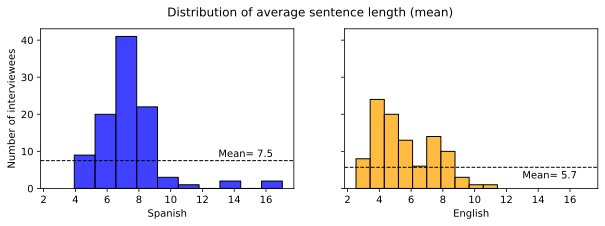

In [5]:
# a) Calculate the number of sentences for each child
df_sample_spa["sentence_count"] = df_sample_spa.text.apply(lambda x: q1_stentence_length(x)[0])
df_sample_eng["sentence_count"] = df_sample_eng.text.apply(lambda x: q1_stentence_length(x)[0])

# b) Calculate the average sentence length for each child
df_sample_spa["sentence_length_mean"] = df_sample_spa.text.apply(lambda x: q1_stentence_length(x)[1])
df_sample_eng["sentence_length_mean"] = df_sample_eng.text.apply(lambda x: q1_stentence_length(x)[1])

# c) Plot the distribution of average sentence length by language
plot_length_distribution, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharex=True, sharey=True)
plot_length_distribution.subplots_adjust(top=0.85)
plot_length_distribution.suptitle("Distribution of average sentence length (mean)", fontsize=12, x=0.5, y=0.95)

sns.histplot(ax=axes[0], data=df_sample_spa, x="sentence_length_mean", bins=10, color="blue")
sns.histplot(ax=axes[1], data=df_sample_eng, x="sentence_length_mean", bins=10, color="orange")

# Modify the plot - Change the xy labels
axes[0].set_xlabel("Spanish"); axes[1].set_xlabel("English")
axes[0].set_ylabel("Number of interviewees")

# Modify the plot - Add the line of Mean
mean_spa = round(df_sample_spa.sentence_length_mean.mean(), 1)
mean_eng = round(df_sample_eng.sentence_length_mean.mean(), 1)

axes[0].axhline(y = mean_spa, color="black", linestyle="--", linewidth=1)
axes[1].axhline(y = mean_eng, color="black", linestyle="--", linewidth=1)

axes[0].annotate(text = f"Mean= {mean_spa}", xy=(13, mean_spa+1))
axes[1].annotate(text = f"Mean= {mean_eng}", xy=(13, mean_eng-3))

d) Conduct T-test for the differences between the two languages

In [6]:
### d) Conduct T-test for the differences 
length_ttest = stats.ttest_ind(
    df_sample_spa["sentence_length_mean"],
    df_sample_eng["sentence_length_mean"], 
)

print("=====")
print("TABLE 3: Average sentence length by language")
print("=====")

Tab3 = pd.DataFrame({
    "Language": ["Spanish", "English"],
    "Sample size": [100, 100],
    "Mean": [mean_spa, mean_eng],
    "Std": [
        round(df_sample_spa.sentence_length_mean.std(), 1), 
        round(df_sample_eng.sentence_length_mean.std(), 1)]
})

Tab3["Mean (± Std)"] = Tab3['Mean'].astype(str) +" (± " + Tab3['Std'].astype(str) + ")"
Tab3["T statistic"] = round(length_ttest.statistic, 1)
Tab3["P value"] = round(length_ttest.pvalue, 1)

Tab3.at[1, "T statistic"] = "N/A" 
Tab3.at[1, "P value"] = "N/A"

Tab3 = Tab3[["Language", "Sample size", "Mean (± Std)", "T statistic", "P value"]]
Tab3

=====
TABLE 3: Average sentence length by language
=====


,Language,Sample size,Mean (± Std),T statistic,P value
0,Spanish,100,7.5 (± 2.1),6.3,0.0
1,English,100,5.7 (± 1.9),N/A,N/A


## 4) RQ2: Most frequently used part of speech

a) Load the language model from Spacy

b) Clean the paragraphs 

c) Match the word tokens with POS and count the corresponding occurences

d) Transform the obtained occurences into readable dataframe and calculate the % 

e) Plot the distribution for the occurences by languages

In [14]:
# a) Load the language model from Spacy
model_spa = spacy.load('es_dep_news_trf')
model_eng = spacy.load('en_core_web_trf')

# b) Clean the paragraphs 
clean_spa = q2_sentence_cleaning(df_dample = df_sample_spa, spa_or_eng_model = model_spa)
clean_eng = q2_sentence_cleaning(df_dample = df_sample_eng, spa_or_eng_model = model_eng)

# c) Match the word tokens with POS and count the corresponding occurences
pos_spa = q2_part_of_speech(cleaned_sentences_list = clean_spa, spa_or_eng_model = model_spa)
pos_eng = q2_part_of_speech(cleaned_sentences_list = clean_eng, spa_or_eng_model = model_eng)

pos_match_spa, pos_count_spa = pos_spa[0], pos_spa[1]
pos_match_eng, pos_count_eng = pos_eng[0], pos_eng[1]

Preview: cleaned sentences
['niño durmió perro', 'niño vio rana', 'niño puso ropa', 'perro llamaron rana']
Preview: cleaned sentences
['boy got present', 'pets', 'wanted open present', 'brand new book loved book']


[Text(0, 0, 'NOUN'),
 Text(1, 0, 'VERB'),
 Text(2, 0, 'ADJ'),
 Text(3, 0, 'PROPN'),
 Text(4, 0, 'INTJ'),
 Text(5, 0, 'ADV'),
 Text(6, 0, 'X'),
 Text(7, 0, 'ADP'),
 Text(8, 0, 'PRON'),
 Text(9, 0, 'AUX'),
 Text(10, 0, 'PUNCT'),
 Text(11, 0, 'SCONJ'),
 Text(12, 0, 'PART'),
 Text(13, 0, 'DET'),
 Text(14, 0, 'CCONJ'),
 Text(15, 0, 'NUM')]

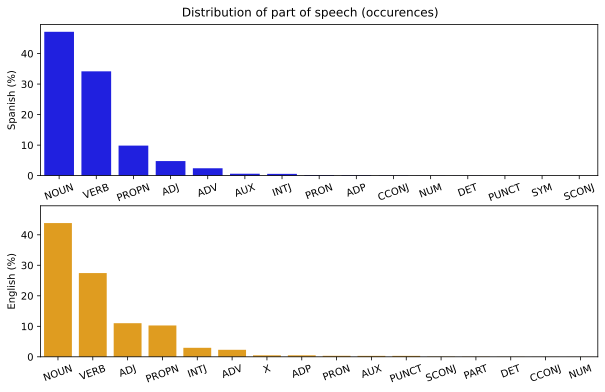

In [31]:
# d) Transform the obtained occurences into readable dataframe and calculate the % 
df_pos_spa = pd.DataFrame(list(pos_count_spa.items())).rename(columns={0:"POS_spa", 1:"Count"})
df_pos_spa = df_pos_spa.sort_values(by = "Count", ascending=False).reset_index(drop = True)
df_pos_spa["Count%"] = round(df_pos_spa["Count"] / df_pos_spa["Count"].sum() * 100, 2)
df_pos_spa["pos_count_order"] = list(df_pos_spa.index + 1)

df_pos_eng = pd.DataFrame(list(pos_count_eng.items())).rename(columns={0:"POS_eng", 1:"Count"})
df_pos_eng = df_pos_eng.sort_values(by = "Count", ascending=False).reset_index(drop = True)
df_pos_eng["Count%"] = round(df_pos_eng["Count"] / df_pos_eng["Count"].sum() * 100, 2)
df_pos_eng["pos_count_order"] = list(df_pos_eng.index + 1)

# d) Plot the distribution for the occurences by languages
plot_pos_distribution, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharey=True)
plot_pos_distribution.suptitle("Distribution of part of speech (occurences)", fontsize=12, x=0.5, y=0.92)

sns.barplot(ax=axes[0], data=df_pos_spa, x="POS_spa", y="Count%", color='blue')
sns.barplot(ax=axes[1], data=df_pos_eng, x="POS_eng", y="Count%", color='orange')

# Modify the plot - Change the xy labels
axes[0].set_xlabel(""), axes[0].set_ylabel("Spanish (%)")
axes[1].set_xlabel(""), axes[1].set_ylabel("English (%)")

axes[0].set_xticklabels(labels=list(df_pos_spa.POS_spa), rotation=20)
axes[1].set_xticklabels(labels=list(df_pos_eng.POS_eng), rotation=20)

## 5) RQ3: Usage frequenies of interested keywords

In [ ]:
def q3_keyword_frequency(df_sample):
    paragraphs_to_sentences = df_dample.text.apply(lambda x: x.split("| "))
    sentence_list = list(np.concatenate(paragraphs_to_sentences).flat)
    word_token = [word_tokenize(i) for i in sentence_list]
    word_token_clean = list(map(lambda x: [i for i in x if not i in stopwords], word_token))
    word_token_clean = list(map(lambda x: [i for i in x if not i in symbols], word_token_clean))
    word_token_clean = list(map(lambda x: [i for i in x if len(i) >1], word_token_clean))
    word_token_clean = [i for i in word_token_clean if i!= []]
    

In [ ]:
df_sample_spa